In [14]:
import main
from main import StepResult, ElasticData, CalculationResult
import network
import matplotlib.pyplot as plt
import convert
import os

opt_dir = "/home/sergey/work/auxetic_optimizer/pos_test"

In [21]:
opt_history = main.load_optimization_log(os.path.join(opt_dir, "optimization_log.pkl"))

In [22]:
steps = [i+1 for i in range(len(opt_history))]
Bs = [step.dG.bulk_modulus for step in opt_history]
Gs = [step.dG.shear_modulus for step in opt_history]
Ps = [step.dG.p_ratio for step in opt_history]
Zs = [step.network.coordination_number for step in opt_history]

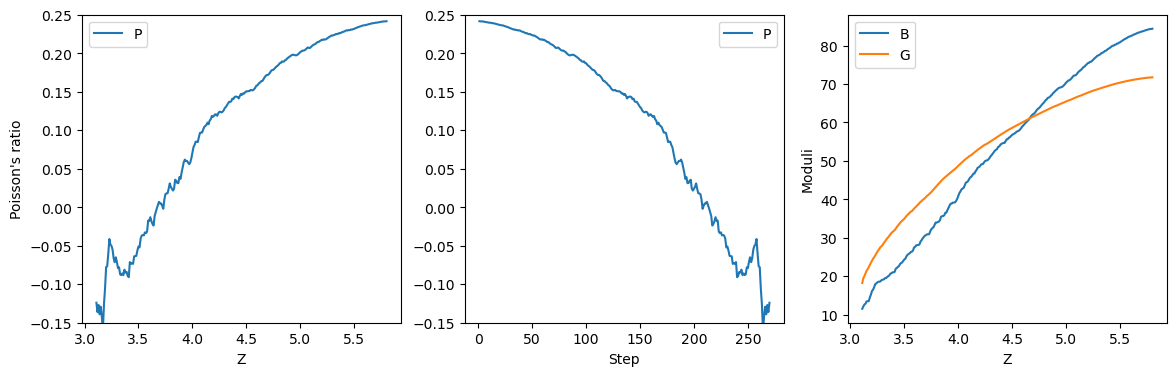

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
# P ratio graph
axs[0].plot(Zs, Ps, label='P')
axs[0].set_ylabel("Poisson's ratio")
axs[0].set_xlabel("Z")
axs[0].set_ylim(-0.15, 0.25)
axs[0].legend()
# P ratio graph
axs[1].plot(steps, Ps, label='P')
axs[1].set_xlabel("Step")
axs[1].set_ylim(-0.15, 0.25)
axs[1].legend()
# Moduli graph
axs[2].plot(Zs, Bs, label='B')
axs[2].plot(Zs, Gs, label='G')
axs[2].set_ylabel("Moduli")
axs[2].set_xlabel("Z")
axs[2].legend()

plt.show()


In [141]:
import time

start = time.perf_counter()
example = network.Network.from_data_file(os.path.join(opt_dir, "original_network.lmp"), include_angles=False, include_dihedrals=False)
# example.write_to_file(os.path.join(opt_dir, "new.lmp"))
end = time.perf_counter()
print(f"Took {end-start:.4f} secs")

Took 0.0039 secs
